Чу Ван Доан, N3247, ИСУ: 343752

# Часть 1. Установка NeuroKit2, импорт библиотек, подготовка данных

In [ ]:
!pip install git+https://github.com/neuropsychology/NeuroKit.git
!wget https://physionet.org/static/published-projects/bidmc/bidmc-ppg-and-respiration-dataset-1.0.0.zip
!unzip /content/bidmc-ppg-and-respiration-dataset-1.0.0.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/neuropsychology/NeuroKit.git to /tmp/pip-req-build-4kb_wblo
  Running command git clone --filter=blob:none --quiet https://github.com/neuropsychology/NeuroKit.git /tmp/pip-req-build-4kb_wblo
  Resolved https://github.com/neuropsychology/NeuroKit.git to commit 3d5ecfca8e9c10a1f4150f8877aba8f34c0d0a22
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for neurokit2: filename=neurokit2-0.2.4-py2.py3-none-any.whl size=1261552 sha256=685f63994a1774b2c3fc292c95ccb3a8f3f386329e779a4aea1c51e70933f83f
  Stored in directory: /tmp/pip-ephem-wheel-cache-xl3bk00n/wheels/69/91/4c/d109443a2d56c7b0c025343bfe670ec37fbafabe317c1fd656
Successfully built neurokit2
--2023-06-17 11:46:59--  https://physionet.org/static/published-projects/bid

In [ ]:
import neurokit2 as nk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

In [ ]:
df = pd.read_csv('/content/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_01_Signals.csv')
df = df.iloc[:37500] # данные берутся только за первые 5 минут наблюдения
df.rename(columns={" PLETH": "PLETH", " V": "V"}, inplace = True)
display(df)

,Time [s],RESP,PLETH,V,AVR,II
0,0.000,0.35386,0.43597,0.52549,0.30392,0.72549
1,0.008,0.35679,0.43206,0.51961,0.33529,0.67059
2,0.016,0.35875,0.42815,0.51569,0.37451,0.60980
3,0.024,0.36168,0.42424,0.50588,0.41961,0.55098
4,0.032,0.36364,0.42131,0.50980,0.44902,0.50000
...,...,...,...,...,...,...
37495,299.960,1.00000,0.51711,0.60000,0.58431,0.29412
37496,299.970,1.00000,0.51026,0.59020,0.58039,0.29412
37497,299.980,1.00000,0.50440,0.57451,0.57451,0.30392
37498,299.980,1.00000,0.49756,0.57059,0.56078,0.33529


# Часть 2. фпг

1.   Стандартный анализ NeuroKit2
2.   Анализ частоты сердечных сокращений
3.   Вариабельность сердечного ритма
4.   Индекс напряженности

### Стандартный анализ фотоплетизмограммы NeuroKit2 (очистка от шумов, частота сердцебиения)

,PPG_Raw,PPG_Clean,PPG_Rate,PPG_Peaks
0,0.43597,-0.028441,89.343077,0.0
1,0.43206,-0.032165,89.343077,0.0
2,0.42815,-0.035807,89.343077,0.0
3,0.42424,-0.039276,89.343077,0.0
4,0.42131,-0.042502,89.343077,0.0
...,...,...,...,...
37495,0.51711,0.068294,90.361446,0.0
37496,0.51026,0.062434,90.361446,0.0
37497,0.50440,0.057112,90.361446,0.0
37498,0.49756,0.052198,90.361446,0.0


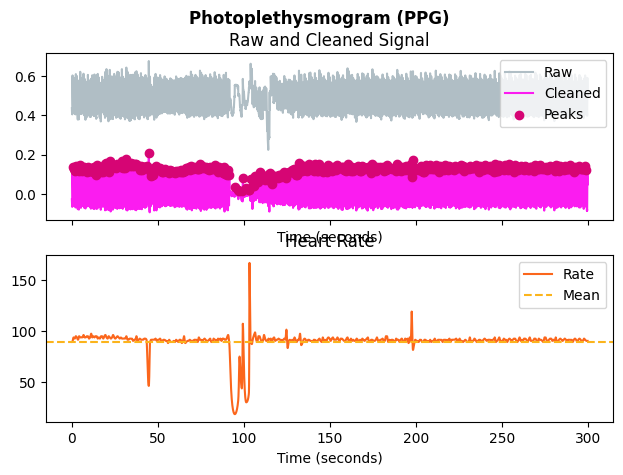

In [ ]:
ppg_signals, ppg_info = nk.ppg_process(df['PLETH'], sampling_rate=125)
nk.ppg_plot(ppg_signals, static=True, sampling_rate=125)

type(ppg_info)
type(ppg_signals)
display(ppg_signals)

## Подробнее про частоту сердцебиения

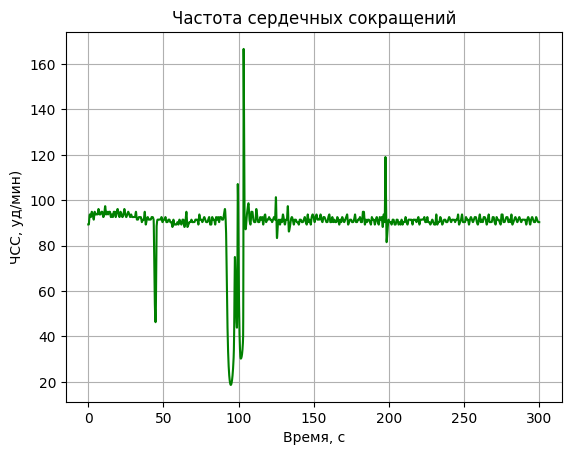

In [ ]:
# Нахождение индексов пиков
peaks = np.where(ppg_signals['PPG_Peaks'])[0]

# Расчет частоты сердечных сокращений (ЧСС)
heart_rate = nk.signal_rate(peaks, sampling_rate=125, desired_length=len(df))
time_hr = np.linspace(df['Time [s]'].min(), df['Time [s]'].max(), len(heart_rate))

# Построение графика ЧСС
plt.plot(time_hr, heart_rate, color='g')
plt.grid(visible=True)
plt.title("Частота сердечных сокращений")
plt.xlabel("Время, с")
plt.ylabel("ЧСС, уд/мин)")
plt.show()

Вариабельность:  162.68411025271485 мс
ЧСС (среднее выборочное):  89.34307741728236 уд/мин


,PPG_Rate_Mean,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,...,HRV_SampEn,HRV_ShanEn,HRV_FuzzyEn,HRV_MSEn,HRV_CMSEn,HRV_RCMSEn,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC
0,89.582458,671.568539,162.68411,35.538977,96.285107,NaN,NaN,NaN,NaN,184.061486,...,0.05134,2.822364,0.206799,0.150576,0.103441,0.085836,0.025408,1.887124,1.434257,0.573331


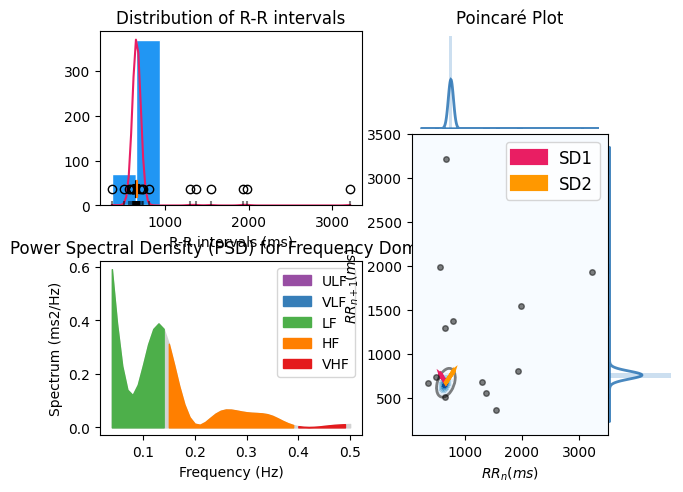

In [ ]:
# Расчет показателей вариабельности сердечного ритма (ВСР)
hart_rate_var = nk.hrv_time(ppg_signals['PPG_Peaks'], sampling_rate=125)
nk.hrv(ppg_signals['PPG_Peaks'], 125, show=True)
print("Вариабельность: ", hart_rate_var['HRV_SDNN'].values[0], "мс")
print("ЧСС (среднее выборочное): ", (1 / (hart_rate_var['HRV_MeanNN'].values[0] / 1000) * 60), "уд/мин")
result = nk.ppg_analyze(ppg_signals, sampling_rate=125)
display(result)

### Индекс напряженности

In [ ]:
print(f"ИН: {result['HRV_SI'].values[0]}")

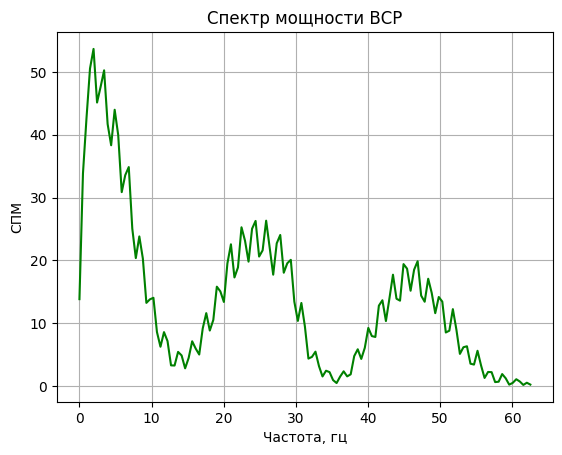

In [ ]:
import scipy.fft
rr_intervals = np.diff(peaks)
freq_values, psd_values = scipy.signal.welch(rr_intervals, fs=125)
plt.plot(freq_values, psd_values, color='g')
plt.title('Спектр мощности ВСР')
plt.xlabel('Частота, гц')
plt.ylabel('СПМ')
plt.grid(visible=True)
plt.show()

# Часть 2. экг

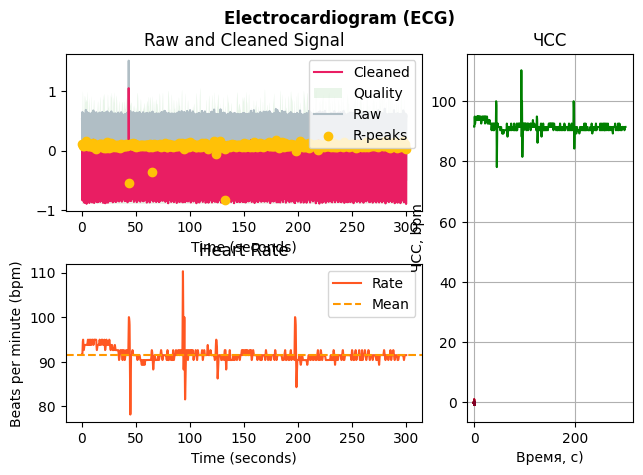

In [ ]:
ecg_signals, ecg_info = nk.ecg_process(df["V"], sampling_rate=125)
nk.ecg_plot(ecg_signals, sampling_rate=125)
peaks = np.where(ecg_signals['ECG_R_Peaks'])[0]
heart_rate = nk.signal_rate(peaks, sampling_rate=125, desired_length=len(df))
time_hr = np.linspace(df['Time [s]'].min(), df['Time [s]'].max(), len(heart_rate))
plt.plot(time_hr, heart_rate, color='g')
plt.title("ЧСС")
plt.xlabel("Время, с)")
plt.grid(visible=True)
plt.ylabel("ЧСС, bpm")
plt.show()

In [ ]:
hart_rate_var = nk.hrv_time(ecg_signals['ECG_R_Peaks'], sampling_rate=125)
print(f"ВСР: {hart_rate_var['HRV_SDNN'].values[0]} ms")
print(f"ЧСС (mean): {(1 / (hart_rate_var['HRV_MeanNN'].values[0] / 1000) * 60)} bpm")

ВСР: 13.439090730426654 ms
ЧСС (mean): 91.5562560102575 bpm


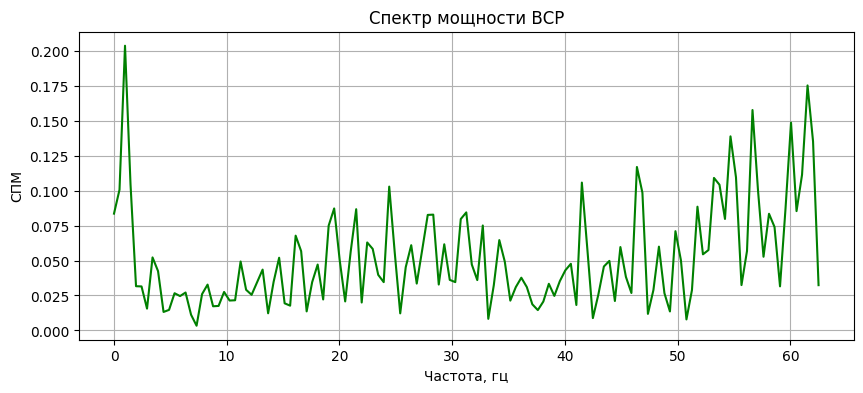

In [ ]:
hrv_time = nk.hrv_time(ecg_signals['ECG_R_Peaks'], sampling_rate=125)
hrv_freq = nk.hrv_frequency(ecg_signals['ECG_R_Peaks'], sampling_rate=125)
rr_intervals = np.diff(peaks)
freq_values, psd_values = scipy.signal.welch(rr_intervals, fs=125)
plt.figure(figsize=(10, 4))
plt.ylabel('СПМ')
plt.xlabel('Частота, гц')
plt.plot(freq_values, psd_values, color='g')
plt.title('Спектр мощности ВСР')
plt.grid(visible=True)
plt.show()